In [23]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import math

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve

# 1. Importing  Data

In [12]:
list1 = pd.read_csv('listings.csv')
list2 = pd.read_csv('/Users/Jialin/Google Drive/Cornell courses/ORIE 4741/Project/Seattle/listings2.csv')
nbhd = pd.read_csv('/Users/Jialin/Google Drive/Cornell courses/ORIE 4741/Project/Seattle/neighbourhoods.csv')
calendar = pd.read_csv('/Users/Jialin/Google Drive/Cornell courses/ORIE 4741/Project/Seattle/calendar.csv')
review1 = pd.read_csv('/Users/Jialin/Google Drive/Cornell courses/ORIE 4741/Project/Seattle/reviews.csv')
review2 = pd.read_csv('/Users/Jialin/Google Drive/Cornell courses/ORIE 4741/Project/Seattle/reviews2.csv')
amenities = pd.read_csv('amenities.csv')

#  2. Data Exploratory Analysis

In [ ]:
# print(list1.columns.values)
# print(list1.shape)

In [ ]:
# print(list2.columns.values)
# print(list2.shape)

In [3]:
# Join list1 and list2 to create the x vector
X = pd.concat([list1, list2], axis=1)
# print(X.shape)
# X.info(verbose = True, null_counts = True)

In [4]:
Z1=X.loc[:, X.dtypes == np.float64] #Extracting columns with values of type float 
Z2=X.loc[:, X.dtypes == np.int64]   #Extracting columns with values of type int
Z3=X.loc[:, X.dtypes == np.object]   #Extracting columns with values of type categorical
X_numeric=pd.concat([Z1,Z2], axis=1)
X_cat = Z3

In [5]:
"""X_numeric has duplicate columns. The code below removes the duplicate columns"""
_, i = np.unique(X_numeric.columns, return_index=True)
X_Num_Cov=X_numeric.iloc[:, i]
# print(X_Num_Cov.describe())
# print(X_Num_Cov.columns.values)
X_Num_Cov.to_csv('Numerical_FS.csv')

In [6]:
_, i = np.unique(X_cat.columns, return_index=True)
X_cat=X_cat.iloc[:, i]
# print(X_cat.describe())
# print(X_cat.info())
X_cat.to_csv('Catgorical_FS.csv')

# Creating X and Y for the dataset

In [15]:
X_select = X_Num_Cov[['reviews_per_month','accommodates','bathrooms','bedrooms','beds','guests_included','latitude','longitude','price']]
X_select['avail'] = list2[['availability_365']]
X_select = pd.concat([X_select, amenities], axis=1)
X_select = X_select.dropna()
Y = X_select['reviews_per_month']
X_select = X_select.drop(['reviews_per_month'], axis = 1)
# print(X_select.info())
X_select.head()



/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,accommodates,bathrooms,bedrooms,beds,guests_included,latitude,longitude,price,avail,Unnamed: 0,...,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Wheelchair Accessible,Wireless Internet
0,4,1.0,1.0,1.0,2,47.636289,-122.371025,85,346,0,...,0,0,0,0,0,0,1,1,0,1
1,4,1.0,1.0,1.0,1,47.639123,-122.365666,150,291,1,...,0,1,0,1,0,0,1,1,0,1
2,11,4.5,5.0,7.0,10,47.629724,-122.369483,975,220,2,...,0,0,1,1,0,0,1,1,0,1
4,6,2.0,3.0,3.0,6,47.632918,-122.372471,450,365,4,...,0,0,1,1,0,0,1,0,0,1
5,2,1.0,1.0,1.0,1,47.630525,-122.366174,120,302,5,...,0,0,1,1,0,0,0,0,0,1


# Splitting data into training and testing sets

In [17]:
num_test = 0.1
X_train, X_test, y_train, y_test = train_test_split(X_select, Y, test_size=num_test, random_state=23)
len(X_train)

2855

# Learning Curve

In [31]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


X_numeric has duplicate columns. The code below removes the duplicate columns


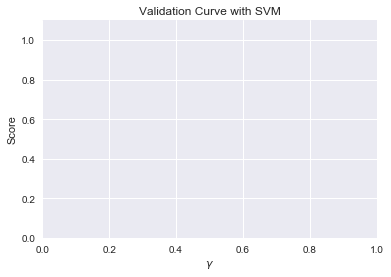

# Ridge Regression with Validation Curve

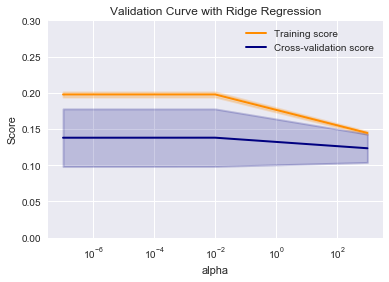

In [66]:
clf = Ridge(alpha=0.0)
clf.fit(X_select, Y) 
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
clf.score(X_train, y_train)

param_range = np.logspace(-7, 3, 3)
# train_scores, test_scores = validation_curve(
#     Ridge(), X_select, Y, param_name="alpha", param_range=param_range,
#     cv=10, scoring="accuracy", n_jobs=1)
train_scores, test_scores = validation_curve(Ridge(), X_select, Y, "alpha",param_range,cv=10, n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Ridge Regression")
plt.xlabel("alpha")
plt.ylabel("Score")
plt.ylim(0.0, 0.3)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

# Linear Regression

0.193048591274
0.194563274523


<module 'matplotlib.pyplot' from '/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

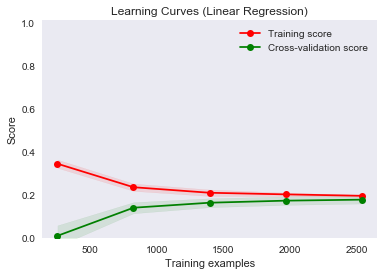

In [32]:
regr = linear_model.LinearRegression()
regr.fit(X_select, Y) 
print(regr.score(X_test, y_test))
print(regr.score(X_train, y_train))
regr.get_params()
regr.coef_

title = "Learning Curves (Linear Regression)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = regr
plot_learning_curve(estimator, title, X_select, Y, (0, 1.01), cv=cv, n_jobs=4)

# Random Forest

In [21]:

clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train, y_train)
# RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=2, max_features='auto', max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=1, min_samples_split=2,
#             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
#             oob_score=False, random_state=0, verbose=0, warm_start=False)
print(clf.feature_importances_)
Y_pred = clf.predict(X_test)
clf.score(X_test, y_test)


ValueError: Unknown label type: 'continuous'

In [ ]:
# X.describe(include=['O'])

In [ ]:
X.head()

In [ ]:
# Extract the Y vector


In [ ]:
print(nbhd.columns.values)
print(nbhd.shape)

In [ ]:
print(review1.columns.values)
print(review1.shape)

In [ ]:
print(review2.columns.values)
print(review2.shape)

In [ ]:
print(calendar.columns.values)
print(calendar.shape)
calendar.head()

In [ ]:
newlist1= list1.drop(['host_name', 'last_review','host_id','calculated_host_listings_count'], axis=1)
newlist1.head()

In [ ]:
list2['averating'] = list2[["review_scores_checkin", "review_scores_accuracy","review_scores_communication", "review_scores_location","review_scores_value", "review_scores_cleanliness"]].mean(axis=1)
ax = sns.regplot(x="averating", y="review_scores_rating", data=list2)

In [ ]:
yy = pd.DataFrame()
yy['review_scores_rating'] = list2['review_scores_rating']
xx = pd.DataFrame()
xx['host_response_rate'] = list2['host_response_rate']
# print(math.isnan(xx['host_response_rate'][3]))
for i in xrange(xx.shape[0]):
    if isinstance(xx['host_response_rate'][i], basestring):
        xx['host_response_rate'][i] = 1.0*int(xx['host_response_rate'][i][:-1])
combine = pd.concat([xx,yy], axis=1)
combine = combine.dropna()

print(combine.tail)
ax = sns.regplot(x='host_response_rate', y="review_scores_rating", data=combine)# 